In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import jagular as jag
import nelpy as nel
import nelpy.plotting as npl

%matplotlib inline

processing block 0
32279 samples are missing from interior of current block; 879+ samples will be filled in by interpolation
processing block 1
1 duplicate timestamp(s) found; only keeping data corresponding to first occurence(s)
1749 samples are missing from interior of current block; 1044+ samples will be filled in by interpolation


/home/etienne/Dropbox/code/jagular/jagular/utils.py:122: UserWarning: some steps in the data are smaller than the requested step size.


processing block 2
1299 samples are missing from interior of current block; 414+ samples will be filled in by interpolation
all timestamps OK


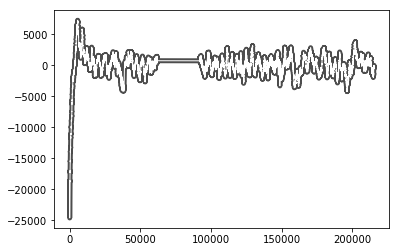

In [2]:
import glob

# file_list = glob.glob('../sample_data/*.rec')
file_list = glob.glob('../sample_data/gap_data.rec')
jfm = jag.io.JagularFileMap(file_list)

# extract only a subset of channels, interpolating over gaps of 200 samples or less:
jag.utils.extract_channels(jfm=jfm,
                           max_gap_size=200,
                           ch_out_prefix='channels/subset_',
                           subset=[9,3,0])

# extract all channels, with no interpolation:
jag.utils.extract_channels(jfm=jfm,
                           ts_out='timestamps_new.raw',
                           ch_out_prefix='channels/',
                           verbose=True)

ts1 = np.fromfile('timestamps.raw', dtype=np.uint32)
x1 = np.fromfile('channels/subset_ch.00.raw', dtype=np.int16)

ts2 = np.fromfile('timestamps_new.raw', dtype=np.uint32)
x2 = np.fromfile('channels/ch.00.raw', dtype=np.int16)

plt.plot(ts1,x1, lw=5, c='0.3')
plt.plot(ts2,x2, lw=1, c='w')

<AnalogSignalArray at 0x7f9906b07240: 1 signals (2 segments)> for a total of 6.1776 seconds


/home/etienne/Dropbox/code/nelpy/nelpy/core/_analogsignalarray.py:267: UserWarning: creating support from time and sampling rate, fs!


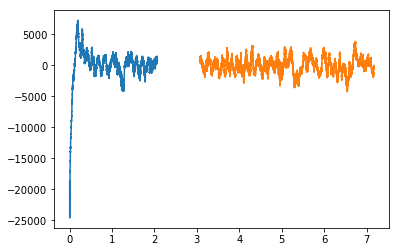

In [3]:
ts = np.fromfile('timestamps.raw', dtype=np.uint32)
y = np.fromfile('channels/subset_ch.00.raw', dtype=np.int16)
sig = nel.AnalogSignalArray(ydata=y, timestamps=ts/30000, fs=30000)
print(sig)
npl.plot(sig)

<AnalogSignalArray at 0x7f9900170240: 1 signals (51 segments)> for a total of 51.0 seconds


/home/etienne/Dropbox/code/nelpy/nelpy/core/_analogsignalarray.py:267: UserWarning: creating support from time and sampling rate, fs!


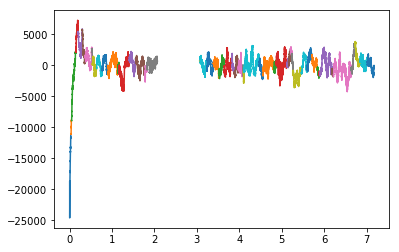

In [4]:
ts = np.fromfile('timestamps_new.raw', dtype=np.uint32)
y = np.fromfile('channels/ch.00.raw', dtype=np.int16)
sig = nel.AnalogSignalArray(ydata=y, timestamps=ts/30000, fs=30000)
print(sig)
npl.plot(sig)